In [1]:
import os
cwd = os.getcwd()
print(cwd)

d:\python_script


In [2]:
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

#pd.set_option('display.max_columns', 40)#展開所有欄位
#pd.set_option('display.max_columns', None)#展開所有欄位
#pd.set_option('display.max_rows', None)#展開所有欄位

In [44]:
cnxn = pyodbc.connect(driver='{SQL Server}', server='10.11.48.12', database='FZSRD_BD',               
               trusted_connection='yes')

#sql = "SELECT * FROM v_henry_A_投資理財"
#sql = "SELECT * FROM [FZSRD_INTERN].[dbo].henry"
sql = "SELECT * FROM [FZSRD_BD].[dbo].v_henry_robin"

data=pd.read_sql(sql, cnxn)
print(data.columns)
cnxn.close()

Index(['henry_flag', '數帳開戶已過月數', 'unino', '網路會員記號', '存款開戶日', '性別', '年齡',
       '客戶行業別', '經濟力_收入信用卡', '薪轉戶記號', '外幣存款記號', 'AUM', '台外幣總存款', '教育程度',
       '職位階級', '公司名稱', '數位帳戶類型', '數帳開戶日', '房屋狀態', '高薪100企業註記', '年齡級距_1',
       '銀行往來家數', '他行平均額度', '信用卡持有月數', '他行平均消費金額', '他行近六個月循環狀況', '他行無擔金額',
       '中期貸款餘額', '長期貸款餘額', 'L1y_wm', '收入估計_百分位', 'edu', 'rev_type'],
      dtype='object')


In [45]:
data.to_csv("D:\python_script\henry.csv", index=False, encoding='utf-8-sig')

In [3]:
import pandas as pd
df = pd.read_csv("D:\python_script\henry.csv", encoding='utf-8-sig')
##

In [6]:
#df.info()
df = df.drop(["unino"],axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241273 entries, 0 to 241272
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   henry_flag  241273 non-null  int64  
 1   數帳開戶已過月數    241273 non-null  int64  
 2   網路會員記號      241273 non-null  int64  
 3   存款開戶日       241273 non-null  int64  
 4   性別          241273 non-null  int64  
 5   年齡          241273 non-null  int64  
 6   客戶行業別       241273 non-null  object 
 7   經濟力_收入信用卡   241244 non-null  float64
 8   薪轉戶記號       241273 non-null  int64  
 9   外幣存款記號      241273 non-null  object 
 10  AUM         241273 non-null  float64
 11  台外幣總存款      241273 non-null  float64
 12  教育程度        241273 non-null  object 
 13  職位階級        241273 non-null  object 
 14  公司名稱        241268 non-null  object 
 15  數位帳戶類型      241273 non-null  object 
 16  數帳開戶日       241273 non-null  int64  
 17  房屋狀態        241273 non-null  object 
 18  高薪100企業註記   241273 non-null  int64  
 19  年齡

In [8]:
df["收入估計_百分位"].value_counts()

05.20百分位          95402
01.<50百分位         86575
02.50百分位~40百分位    25486
03.40百分位~30百分位    18293
04.30百分位~20百分位    15488
其他                   29
Name: 收入估計_百分位, dtype: int64

In [9]:
df["henry_flag"].value_counts()


0    176554
1     64719
Name: henry_flag, dtype: int64

In [10]:
len(df[(df['年齡'] >= 25) & (df['年齡'] <= 39) & (df["收入估計_百分位"]=="05.20百分位")])

64719

In [11]:
df[(df['年齡'] >= 25) & (df['年齡'] <= 39) & (df["收入估計_百分位"]=="05.20百分位")].index

Int64Index([     1,      4,     10,     11,     12,     13,     25,     32,
                34,     39,
            ...
            241239, 241247, 241250, 241254, 241255, 241257, 241258, 241261,
            241262, 241265],
           dtype='int64', length=64719)

In [12]:
df['target'] = 0

#target_index = df[(df['年齡'] >= 25) & (df['年齡'] <= 39) & (df["收入估計_百分位"]=="05.20百分位")].head().index
#df.iloc[target_index]

target_index = df[(df['年齡'] >= 25) & (df['年齡'] <= 39) & (df["收入估計_百分位"]=="05.20百分位")].index
for i in target_index:
    df.iloc[i, -1] = 1#最後一列 update為0



In [13]:
df['target'].value_counts()

0    176554
1     64719
Name: target, dtype: int64

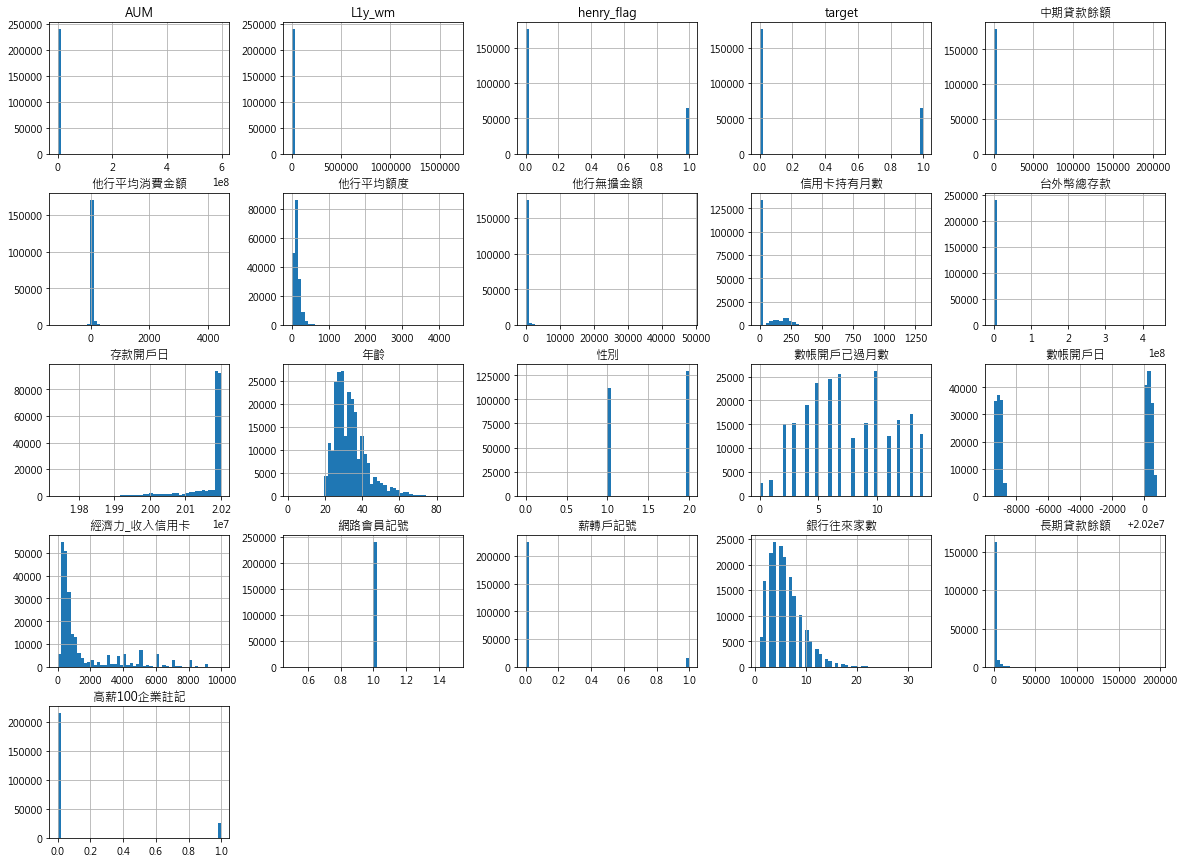

In [14]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

df.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
df.head(1)

,henry_flag,數帳開戶已過月數,網路會員記號,存款開戶日,性別,年齡,客戶行業別,經濟力_收入信用卡,薪轉戶記號,外幣存款記號,...,他行平均消費金額,他行近六個月循環狀況,他行無擔金額,中期貸款餘額,長期貸款餘額,L1y_wm,收入估計_百分位,edu,rev_type,target
0,0,7,1,20200121,1,30,批發及零售業,427.0,0,Y,...,19.0,T,49.0,0.0,0.0,0.0,01.<50百分位,4,正常繳款,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241273 entries, 0 to 241272
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   henry_flag  241273 non-null  int64  
 1   數帳開戶已過月數    241273 non-null  int64  
 2   網路會員記號      241273 non-null  int64  
 3   存款開戶日       241273 non-null  int64  
 4   性別          241273 non-null  int64  
 5   年齡          241273 non-null  int64  
 6   客戶行業別       241273 non-null  object 
 7   經濟力_收入信用卡   241244 non-null  float64
 8   薪轉戶記號       241273 non-null  int64  
 9   外幣存款記號      241273 non-null  object 
 10  AUM         241273 non-null  float64
 11  台外幣總存款      241273 non-null  float64
 12  教育程度        241273 non-null  object 
 13  職位階級        241273 non-null  object 
 14  公司名稱        241268 non-null  object 
 15  數位帳戶類型      241273 non-null  object 
 16  數帳開戶日       241273 non-null  int64  
 17  房屋狀態        241273 non-null  object 
 18  高薪100企業註記   241273 non-null  int64  
 19  年齡

In [18]:
cn = df.columns.tolist()
#ap_data_dummy.columns.tolist()

for col in cn:
    display(df[col].value_counts(ascending=True).head(5).to_frame())

,henry_flag
1,64719
0,176554


,數帳開戶已過月數
0,2756
1,3329
8,12080
11,12522
14,12963


,網路會員記號
1,241273


,存款開戶日
19940406,1
19960914,1
19890815,1
20040825,1
20041209,1


,性別
0,94
1,111364
2,129815


,年齡
2,1
84,1
88,1
90,1
85,2


,客戶行業別
政治人物／演藝人員,1
賭博／夜總會相關行業,47
礦石及土石採取業,56
藝品或寶石交易,184
農林漁牧業,744


,經濟力_收入信用卡
4152.0,1
4518.0,1
2464.0,1
3285.0,1
2662.0,1


,薪轉戶記號
1,15326
0,225947


,外幣存款記號
N,2446
Y,238827


,AUM
3.500255e+05,1
2.675597e+05,1
2.138333e+04,1
2.373467e+03,1
1.052916e+06,1


,台外幣總存款
5.222667e+02,1
9.582893e+05,1
1.259609e+06,1
2.554157e+04,1
1.956767e+04,1


,教育程度
ND,9
7其他,610
1國中,1475
6博士以上,2550
3專科,17186


,職位階級
13_會計師,104
ND,327
14_律師,380
10_董事,973
15_醫師,2152


,公司名稱
新典美學牙醫診所,1
桃園市永平工商,1
億暉,1
齊鵬工程股份有跟公司,1
百威高雄分公司,1


,數位帳戶類型
31:數位三(限同一ID互轉),9696
21.數位二,60755
11:數位一(同一般帳戶),72354
32.數位三(小額非約轉),98468


,數帳開戶日
20190613,1
20190610,1
20190606,1
20190611,2
20191215,3


,房屋狀態
ND,2252
宿舍,4782
租賃,25035
自置,31177
父母產業,57640


,高薪100企業註記
1,25214
0,216059


,年齡級距_1
1. <25,25796
4. 35-39,43696
5. >40,47065
3. 30-34,59616
2. 25-29,65100


,銀行往來家數
32.0,1
33.0,1
30.0,3
29.0,5
28.0,11


,他行平均額度
838.0,1
812.0,1
868.0,1
1091.0,1
684.0,1


,信用卡持有月數
366.0,1
1312.0,1
434.0,1
377.0,1
47.0,1


,他行平均消費金額
304.0,1
589.0,1
-292.0,1
-220.0,1
1144.0,1


,他行近六個月循環狀況
I,2871
R,4029
,6267
O,16482
T,150134


,他行無擔金額
1886.0,1
2034.0,1
1890.0,1
3345.0,1
2747.0,1


,中期貸款餘額
3114.0,1
2780.0,1
858.0,1
7605.0,1
1688.0,1


,長期貸款餘額
1542.0,1
10317.0,1
2278.0,1
20629.0,1
7144.0,1


,L1y_wm
101.358465,1
10192.424411,1
1611.760214,1
82.626349,1
9288.761975,1


,收入估計_百分位
其他,29
04.30百分位~20百分位,15488
03.40百分位~30百分位,18293
02.50百分位~40百分位,25486
01.<50百分位,86575


,edu
N,9
7,284
7,326
1,667
1,808


,rev_type
無須繳費,2871
循環戶,20511
ND,67757
正常繳款,150134


,target
1,64719
0,176554


In [21]:

df_dummy = df.drop(["存款開戶日","公司名稱","收入估計_百分位","網路會員記號","edu","henry_flag","年齡級距_1","L1y_wm","數帳開戶日"],axis=1)

df_dummy['外幣存款記號'] = df_dummy['外幣存款記號'].map({'Y':1, 'N':0})
df_dummy['數位帳戶類型'] = df_dummy['數位帳戶類型'].map({'11:數位一(同一般帳戶)':1, '21.數位二':2,"31:數位三(限同一ID互轉)":3, "32.數位三(小額非約轉)":4})

df_dummy = pd.get_dummies(df_dummy, columns=['客戶行業別','教育程度','職位階級','房屋狀態',"他行近六個月循環狀況","rev_type"])

In [23]:
cn = df_dummy.columns.tolist()
#ap_data_dummy.columns.tolist()

for col in cn:
#    print("{0}".format(cn))
    display(df_dummy[col].value_counts(ascending=True).head(2).to_frame())

,數帳開戶已過月數
0,2756
1,3329


,性別
0,94
1,111364


,年齡
2,1
84,1


,經濟力_收入信用卡
4152.0,1
4518.0,1


,薪轉戶記號
1,15326
0,225947


,外幣存款記號
0,2446
1,238827


,AUM
350025.511989,1
267559.666667,1


,台外幣總存款
522.266667,1
958289.300000,1


,數位帳戶類型
3,9696
2,60755


,高薪100企業註記
1,25214
0,216059


,銀行往來家數
32.0,1
33.0,1


,他行平均額度
838.0,1
812.0,1


,信用卡持有月數
366.0,1
1312.0,1


,他行平均消費金額
304.0,1
589.0,1


,他行無擔金額
1886.0,1
2034.0,1


,中期貸款餘額
3114.0,1
2780.0,1


,長期貸款餘額
1542.0,1
10317.0,1


,target
1,64719
0,176554


,客戶行業別_ND
1,48022
0,193251


,客戶行業別_不動產及租賃業
1,1849
0,239424


,客戶行業別_住宿及餐飲業
1,9485
0,231788


,客戶行業別_保險業
1,4499
0,236774


,客戶行業別_其他
1,12439
0,228834


,客戶行業別_各級學校/學術機構
1,12024
0,229249


,客戶行業別_學生
1,6493
0,234780


,客戶行業別_家管
1,8266
0,233007


,客戶行業別_專業人士
1,5219
0,236054


,客戶行業別_建築業
1,3458
0,237815


,客戶行業別_批發及零售業
1,11867
0,229406


,客戶行業別_技術服務業
1,16355
0,224918


,客戶行業別_投信／投顧／證券
1,1371
0,239902


,客戶行業別_政府機構
1,7723
0,233550


,客戶行業別_政治人物／演藝人員
1,1
0,241272


,客戶行業別_水電燃氣業
1,1385
0,239888


,客戶行業別_無業
1,1887
0,239386


,客戶行業別_礦石及土石採取業
1,56
0,241217


,客戶行業別_自由業
1,5680
0,235593


,客戶行業別_藝品或寶石交易
1,184
0,241089


,客戶行業別_製造業
1,25404
0,215869


,客戶行業別_貿易買賣業
1,6906
0,234367


,客戶行業別_資訊業
1,23678
0,217595


,客戶行業別_賭博／夜總會相關行業
1,47
0,241226


,客戶行業別_軍官/軍人
1,1380
0,239893


,客戶行業別_軍警機構
1,3431
0,237842


,客戶行業別_農林漁牧業
1,744
0,240529


,客戶行業別_運輸或倉儲及通訊業
1,6578
0,234695


,客戶行業別_金融業
1,14842
0,226431


,教育程度_1國中
1,1475
0,239798


,教育程度_2高中
1,17520
0,223753


,教育程度_3專科
1,17186
0,224087


,教育程度_4大學
0,96494
1,144779


,教育程度_5碩士
1,57144
0,184129


,教育程度_6博士以上
1,2550
0,238723


,教育程度_7其他
1,610
0,240663


,教育程度_ND
1,9
0,241264


,職位階級_10_董事
1,973
0,240300


,職位階級_11_負責人
1,6948
0,234325


,職位階級_12_其他
1,22825
0,218448


,職位階級_13_會計師
1,104
0,241169


,職位階級_14_律師
1,380
0,240893


,職位階級_15_醫師
1,2152
0,239121


,職位階級_1_無
1,19590
0,221683


,職位階級_2_作業員
1,5624
0,235649


,職位階級_3_約聘
1,6414
0,234859


,職位階級_4_醫護
1,8162
0,233111


,職位階級_5_一般
0,101752
1,139521


,職位階級_6_老師
1,8328
0,232945


,職位階級_7_中階主管
1,15861
0,225412


,職位階級_8_高階主管
1,4064
0,237209


,職位階級_ND
1,327
0,240946


,房屋狀態_ND
1,2252
0,239021


,房屋狀態_其他
1,120387
0,120886


,房屋狀態_宿舍
1,4782
0,236491


,房屋狀態_父母產業
1,57640
0,183633


,房屋狀態_租賃
1,25035
0,216238


,房屋狀態_自置
1,31177
0,210096


,他行近六個月循環狀況_
1,6267
0,235006


,他行近六個月循環狀況_I
1,2871
0,238402


,他行近六個月循環狀況_O
1,16482
0,224791


,他行近六個月循環狀況_R
1,4029
0,237244


,他行近六個月循環狀況_T
0,91139
1,150134


,rev_type_ND
1,67757
0,173516


,rev_type_循環戶
1,20511
0,220762


,rev_type_正常繳款
0,91139
1,150134


,rev_type_無須繳費
1,2871
0,238402


In [24]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241273 entries, 0 to 241272
Data columns (total 85 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   數帳開戶已過月數          241273 non-null  int64  
 1   性別                241273 non-null  int64  
 2   年齡                241273 non-null  int64  
 3   經濟力_收入信用卡         241244 non-null  float64
 4   薪轉戶記號             241273 non-null  int64  
 5   外幣存款記號            241273 non-null  int64  
 6   AUM               241273 non-null  float64
 7   台外幣總存款            241273 non-null  float64
 8   數位帳戶類型            241273 non-null  int64  
 9   高薪100企業註記         241273 non-null  int64  
 10  銀行往來家數            179783 non-null  float64
 11  他行平均額度            179783 non-null  float64
 12  信用卡持有月數           179783 non-null  float64
 13  他行平均消費金額          179783 non-null  float64
 14  他行無擔金額            179783 non-null  float64
 15  中期貸款餘額            179783 non-null  float64
 16  長期貸款餘額            17

In [25]:
from sklearn import tree

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})



df_dummy_dna = df_dummy.dropna()

target = df_dummy_dna["target"]

feature = df_dummy_dna.drop(["target","經濟力_收入信用卡","年齡"],axis=1)

max_depth = 5
min_samples_split = 3

clf = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
clf = clf.fit(feature, target)


feature_columns = list(feature.columns)
#cn = set(list(ap_label))


In [26]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179782 entries, 0 to 241272
Data columns (total 82 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   數帳開戶已過月數          179782 non-null  int64  
 1   性別                179782 non-null  int64  
 2   薪轉戶記號             179782 non-null  int64  
 3   外幣存款記號            179782 non-null  int64  
 4   AUM               179782 non-null  float64
 5   台外幣總存款            179782 non-null  float64
 6   數位帳戶類型            179782 non-null  int64  
 7   高薪100企業註記         179782 non-null  int64  
 8   銀行往來家數            179782 non-null  float64
 9   他行平均額度            179782 non-null  float64
 10  信用卡持有月數           179782 non-null  float64
 11  他行平均消費金額          179782 non-null  float64
 12  他行無擔金額            179782 non-null  float64
 13  中期貸款餘額            179782 non-null  float64
 14  長期貸款餘額            179782 non-null  float64
 15  客戶行業別_ND          179782 non-null  uint8  
 16  客戶行業別_不動產及租賃業     17

In [27]:
text_representation = tree.export_text(clf,feature_names=feature_columns)
print(text_representation)

|--- 他行平均額度 <= 149.50
|   |--- AUM <= 0.15
|   |   |--- 房屋狀態_其他 <= 0.50
|   |   |   |--- 他行平均額度 <= 96.50
|   |   |   |   |--- 他行無擔金額 <= 1513.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 他行無擔金額 >  1513.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- 他行平均額度 >  96.50
|   |   |   |   |--- 信用卡持有月數 <= 99.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 信用卡持有月數 >  99.50
|   |   |   |   |   |--- class: 0
|   |   |--- 房屋狀態_其他 >  0.50
|   |   |   |--- 數帳開戶已過月數 <= 3.50
|   |   |   |   |--- rev_type_循環戶 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- rev_type_循環戶 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- 數帳開戶已過月數 >  3.50
|   |   |   |   |--- 中期貸款餘額 <= 96.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 中期貸款餘額 >  96.50
|   |   |   |   |   |--- class: 0
|   |--- AUM >  0.15
|   |   |--- 教育程度_5碩士 <= 0.50
|   |   |   |--- 房屋狀態_其他 <= 0.50
|   |   |   |   |--- AUM <= 914478.25
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AUM 

In [28]:
df_dummy_dna["target"].value_counts()

0    148590
1     31192
Name: target, dtype: int64

In [29]:
df_dummy_dna[(df_dummy_dna["經濟力_收入信用卡"]<=832.5)]["target"].value_counts().sort_index()



0    134042
1      4838
Name: target, dtype: int64

In [30]:
df_dummy_dna[(df_dummy_dna["經濟力_收入信用卡"]>832.5)]["target"].value_counts().sort_index()

0    14548
1    26354
Name: target, dtype: int64

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

max_depth = 7
min_samples_split = 3

feature_columns = list(feature.columns)
#cn = set(list(ap_label))


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,24), dpi=500)

tree.plot_tree(clf,
               #class_names=cn,
              feature_names=feature_columns,
               #fontsize=6,               
               filled=True
              );

plt.show()

fig.savefig('imagename.png')

plt.savefig('tree_high_dpi', dpi=100)

<Figure size 432x288 with 0 Axes>

In [31]:
text_representation = tree.export_text(clf,feature_names=feature_columns)
print(text_representation)

|--- 他行平均額度 <= 149.50
|   |--- AUM <= 0.15
|   |   |--- 房屋狀態_其他 <= 0.50
|   |   |   |--- 他行平均額度 <= 96.50
|   |   |   |   |--- 他行無擔金額 <= 1513.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 他行無擔金額 >  1513.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- 他行平均額度 >  96.50
|   |   |   |   |--- 信用卡持有月數 <= 99.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 信用卡持有月數 >  99.50
|   |   |   |   |   |--- class: 0
|   |   |--- 房屋狀態_其他 >  0.50
|   |   |   |--- 數帳開戶已過月數 <= 3.50
|   |   |   |   |--- rev_type_循環戶 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- rev_type_循環戶 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- 數帳開戶已過月數 >  3.50
|   |   |   |   |--- 中期貸款餘額 <= 96.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 中期貸款餘額 >  96.50
|   |   |   |   |   |--- class: 0
|   |--- AUM >  0.15
|   |   |--- 教育程度_5碩士 <= 0.50
|   |   |   |--- 房屋狀態_其他 <= 0.50
|   |   |   |   |--- AUM <= 914478.25
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AUM 